<a href="https://colab.research.google.com/github/syuhraputri27/syuhraputri27/blob/main/507327_KerasMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Keras untuk MNIST**

Load Data

In [ ]:
import keras
import tensorflow as tf
from keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

11501568/11490434 [==============================] - 0s 0us/step


Define Model

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model1 = Sequential()
model1.add(Flatten())
model1.add(Dense(64,activation='relu'))
model1.add(Dense(10,activation='softmax'))

Compile Model, Fit Model, Save Model, and Evaluasi Model

In [ ]:
model1.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['acc'])
history1 = model1.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_test, y_test))
model1.save('my_model1.h5')
model1.evaluate(X_test, y_test)


Epoch 1/10
600/600 [==============================] - 3s 4ms/step - loss: 0.3944 - acc: 0.8914 - val_loss: 0.2282 - val_acc: 0.9338
Epoch 2/10
600/600 [==============================] - 2s 4ms/step - loss: 0.2003 - acc: 0.9435 - val_loss: 0.1777 - val_acc: 0.9501
Epoch 3/10
600/600 [==============================] - 2s 4ms/step - loss: 0.1525 - acc: 0.9564 - val_loss: 0.1465 - val_acc: 0.9558
Epoch 4/10
600/600 [==============================] - 2s 4ms/step - loss: 0.1234 - acc: 0.9644 - val_loss: 0.1292 - val_acc: 0.9619
Epoch 5/10
600/600 [==============================] - 2s 4ms/step - loss: 0.1044 - acc: 0.9699 - val_loss: 0.1132 - val_acc: 0.9659
Epoch 6/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0890 - acc: 0.9736 - val_loss: 0.1084 - val_acc: 0.9680
Epoch 7/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0772 - acc: 0.9773 - val_loss: 0.1011 - val_acc: 0.9696
Epoch 8/10
600/600 [==============================] - 2s 4ms/step - loss: 0.

[0.08802219480276108, 0.9733999967575073]

Visualisasi Evaluasi Model

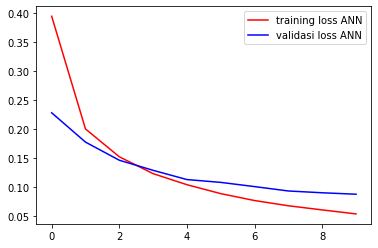

In [ ]:
import matplotlib.pyplot as plt

epochs = range(10)
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']
plt.plot(epochs,loss1,'r',label='training loss ANN')
plt.plot(epochs,val_loss1,'b',label='validasi loss ANN')
plt.legend()

Load Model and Prediction

In [ ]:
import numpy as np
from keras.models import load_model

model_simpan = load_model('my_model1.h5')
pred = model_simpan.predict(X_test)
print('label actual:', np.argmax(y_test[30]))
print('label prediction:', np.argmax(pred[30]))

label actual: 3
label prediction: 3
